In [2]:
import numpy as np
import numpy

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy import integrate

In [5]:
import sympy

In [6]:
# sympy.init_printing()

In [7]:
t, R, r, g, sigma, delta = sympy.symbols(" t, R, r, g, sigma, delta")

In [8]:
Y, y =sympy.symbols("Y, y", cls=sympy.Function)

In [9]:
ode1 = sympy.Eq(sigma*r**2*sympy.sqrt(2*g*(Y(t)-y(t))+Y(t).diff(t)**2-y(t).diff(t)**2)/(R-delta)**2-y(t).diff(t))
ode1

D:\anaconda3\lib\site-packages\sympy\core\relational.py:486: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


Eq(r**2*sigma*sqrt(2*g*(Y(t) - y(t)) + Derivative(Y(t), t)**2 - Derivative(y(t), t)**2)/(R - delta)**2 - Derivative(y(t), t), 0)

In [10]:
ode2 = sympy.Eq(sigma*r**2*sympy.sqrt(2*g*(Y(t)-y(t))+Y(t).diff(t)**2-y(t).diff(t)**2)/R**2-Y(t).diff(t))
ode2

Eq(-Derivative(Y(t), t) + r**2*sigma*sqrt(2*g*(Y(t) - y(t)) + Derivative(Y(t), t)**2 - Derivative(y(t), t)**2)/R**2, 0)

In [11]:
f1 , f2, f3, f4 = sympy.symbols("f_1, f_2, f_3, f_4", cls=sympy.Function)
varchange = {Y(t).diff(t): f2(t).diff(t),
            Y(t): f1(t),
            y(t).diff(t): f4(t).diff(t),
            y(t): f3(t)}
ode1_vc = ode1.subs(varchange)
ode2_vc = ode2.subs(varchange)
ode3 = f1(t).diff(t) - f2(t)
ode4 = f3(t).diff(t) - f4(t)

In [12]:
f = sympy.Matrix([f1(t), f2(t), f3(t), f4(t)])
vcsol = sympy.solve((ode1_vc, ode2_vc, ode3, ode4), f.diff(t), dict=True)
f_vc = f.diff(t).subs(vcsol[0])

In [13]:
params = {R: 0.10, r:0.002, g: 9.8, sigma: 0.15, delta: 0.002}
_f_np = sympy.lambdify((t, f), f_vc.subs(params), 'numpy')

In [14]:
f_np = lambda _t, _f, *args: _f_np(_t, _f)
jac = sympy.Matrix([[fj.diff(fi) for fi in f] for fj in f_vc])

In [15]:
_jac_np = sympy.lambdify((t, f), jac.subs(params), 'numpy')
jac_np = lambda _t, _f, *args: _jac_np(_t, _f)

In [16]:
y0 = [0.01, 0, 0, 0]
tt = np.linspace(0, 100, 100)
r = integrate.ode(f_np, jac_np).set_initial_value(y0, tt[0])
dt = tt[1] - tt[0]
ff = np.zeros((len(tt), len(y0)))
idx = 0
while r.successful() and r.t < tt[-1]:
    ff[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

In [17]:
Y_np, y_np = ff[:, 0], ff[:, 2]

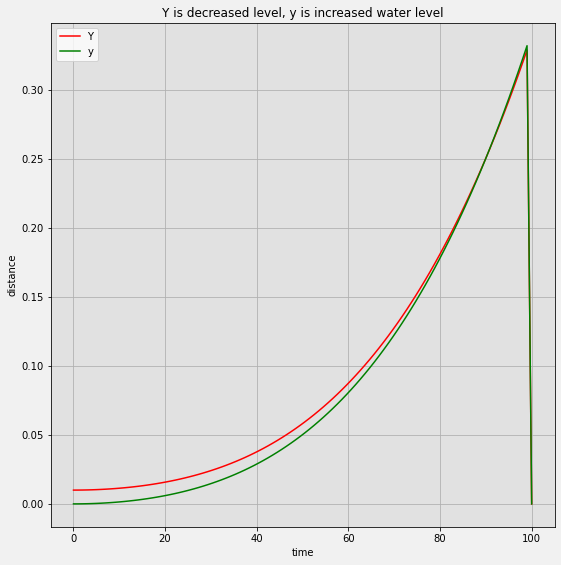

In [19]:
fig = plt.figure (figsize=(10, 10), facecolor='#f1f1f1')
left, bottom, width, height = 0.7, 0.7, 0.7, 0.7
ax = fig.add_axes((left, bottom, width, height), facecolor='#e1e1e1')
ax.plot(tt, Y_np,  'r', label='Y')
ax.plot(tt, -y_np, 'g', label = 'y')
ax.set_xlabel('time')
ax.set_ylabel('distance')
ax.set_title('Y is decreased level, y is increased water level')
ax.legend()
ax.grid()